In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

flatui = ["#9b59b6", "#3498db", '#a9a9a9', '#008000', '#b8860b', '#7b68ee']
sns.set_palette(sns.color_palette(flatui))


pth='/home/morteza/dlc_projects/Analysis/Currencodes/TDA/Visualization/simplex_proj/simplex/' #GET A LIST OF DATA
dset=[]


for root, dirs, files in os.walk(pth):
    for fname in files:         #8 third 
        if fname.endswith('csv') :
            case=root+'/'+fname #construct the path to file
            df=pd.read_csv(case).dropna()   #read Body_head
                
            for j in np.unique(df['dimension'].values):
                    
                dset.append((fname[8:11], fname[11:14], j , np.mean(df[df['dimension']==j]                                                                                        ['prediction_length'])))

simplex_df=pd.DataFrame(dset, columns=['treatment', 'ID', 'dimension', 'predicted_length'])


In [2]:
np.unique(simplex_df['predicted_length'].loc[simplex_df['dimension']==5])

array([107.09722222, 109.57709251, 138.26872247, 162.65531915,
       164.94871795, 170.79098361, 182.28340081, 182.42727273,
       184.12      , 185.03846154, 185.5875    , 193.97165992,
       200.01156069, 205.63445378, 209.42259414, 215.472     ,
       217.86693548, 218.78761062, 219.17154812, 224.456     ,
       225.20576132, 225.96347032, 228.75431034, 233.7295082 ,
       235.        , 235.06122449, 237.8879668 , 241.02083333,
       241.21848739, 241.89285714, 242.56540084, 243.79352227,
       244.87295082, 245.64112903, 247.11814346, 247.56837607,
       249.66666667, 251.868     , 251.99574468, 253.14693878,
       254.16182573, 254.69777778, 255.67479675, 255.84210526,
       258.08474576, 259.05668016, 259.33333333, 259.40756303,
       260.83935743, 261.06504065, 262.108     , 262.76415094,
       262.98790323, 263.00803213, 264.47698745, 266.13168724,
       268.52439024, 269.30327869, 270.484     , 271.39516129,
       271.43265306, 275.61382114, 277.58474576, 277.65

In [3]:
pth='/home/morteza/dlc_projects/Analysis/Currencodes/TDA/Visualization/simplex_proj/shuffle/' #GET A LIST OF DATA
dset=[]


for root, dirs, files in os.walk(pth):
    for fname in files:         #8 third 
        if fname.endswith('csv') :
            case=root+'/'+fname #construct the path to file
            df=pd.read_csv(case).dropna()   #read Body_head
                
            for j in np.unique(df['dimension'].values):
                    
                dset.append(('scrambled', fname[11:14], j , np.mean(df[df['dimension']==j]['prediction_length'])))

shuffle_df=pd.DataFrame(dset, columns=['treatment', 'ID', 'dimension', 'predicted_length'])



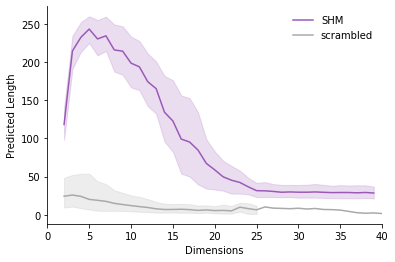

In [4]:
final_df=simplex_df.append(shuffle_df)


flatui = ["#9b59b6",'#a9a9a9']
sns.set_palette(sns.color_palette(flatui))


sns.lineplot(x='dimension', y='predicted_length', hue='treatment', data=final_df.loc[final_df['treatment'].isin(['SHM','scrambled'])])

plt.legend(frameon=False)

plt.xlim(0,40)

plt.xlabel('Dimensions')
plt.ylabel('Predicted Length')
sns.despine()
plt.savefig('sham_prediction')

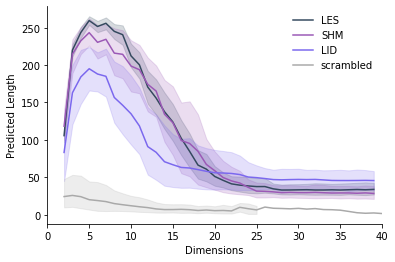

In [5]:
flatui = [ "#34495e","#9b59b6", '#7b68ee','#a9a9a9']
sns.set_palette(sns.color_palette(flatui))

final_df=simplex_df.append(shuffle_df)


sns.lineplot(x='dimension', y='predicted_length', hue='treatment', data=final_df.loc[final_df['treatment'].isin(['LID','LES','SHM','scrambled'])])

plt.legend(frameon=False)

plt.xlim(0,40)

plt.xlabel('Dimensions')
plt.ylabel('Predicted Length')
sns.despine()
plt.savefig('simplex_line_body.svg')

(150.0, 300.0)

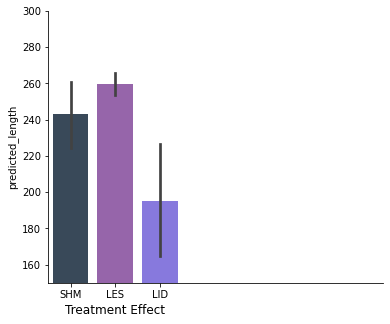

In [6]:
flatui = [ "#34495e","#9b59b6", '#7b68ee']
sns.set_palette(sns.color_palette(flatui))

fig1 = plt.figure(figsize=(6, 5))
ax1=fig1.add_subplot(111)



sns.barplot(x='treatment', y='predicted_length', data=final_df.loc[final_df['dimension'].isin([5])],ax=ax1,
                             order=['SHM', 'LES', 'LID'])
sns.despine()

plt.xlim(-.5, 7)
plt.xlabel('Treatment Effect', fontsize='large', position=[0.2,0.1])
plt.xlabel('Treatment Effect', fontsize='large', position=[0.2,0.1])
plt.ylim(150, 300)

In [7]:
from scipy import stats
import numpy as np

g1=np.array(final_df['predicted_length'].loc[(final_df['dimension']==6) & (final_df['treatment']=='LES')])
g2=np.array(final_df['predicted_length'].loc[(final_df['dimension']==6) &( final_df['treatment']=='LID')])

print(stats.ks_2samp(g1,g2)[1])
print(stats.ttest_ind(g1,g2)[1])

0.0003479802275850874
1.5166013513573047e-06


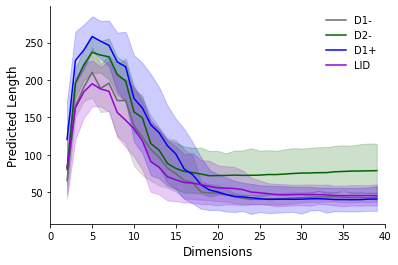

In [10]:
flatui = ['dimgray', 'darkgreen', 'blue', 'darkviolet']
sns.set_palette(sns.color_palette(flatui)) 

final_df['treatment'].replace(['SKF', 'D1A', 'D2A'], ['D1+', 'D1-','D2-'], inplace=True)
sns.lineplot(x='dimension', y='predicted_length', hue='treatment', data=final_df.loc[final_df['treatment'].isin(['LID', 'D1+', 'D1-','D2-'])])
plt.legend(frameon=False)

plt.xlim(0,40)

plt.xlabel('Dimensions', fontsize='large')
plt.ylabel('Predicted Length', fontsize='large')



sns.despine()


plt.savefig('simplex_treatment.svg')

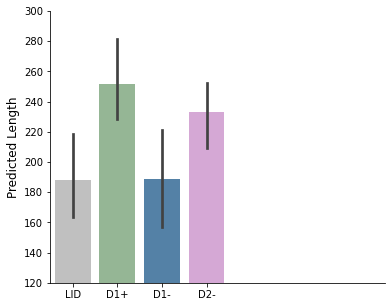

In [11]:
flatui = ['silver', 'darkseagreen', 'steelblue', 'plum']
sns.set_palette(sns.color_palette(flatui))


fig1 = plt.figure(figsize=(6, 5))
ax1=fig1.add_subplot(111)



sns.barplot(x='treatment', y='predicted_length', data=final_df.loc[final_df['dimension'].isin([6])],ax=ax1,
                             order=[ 'LID', 'D1+', 'D1-','D2-'])
sns.despine()
plt.ylim(120, 300)
plt.xlim(-.5, 7)

plt.ylabel('Predicted Length', fontsize='large')
plt.xlabel('')
#plt.text(0.5, 310, 'Dimension 7', fontsize='large')

plt.savefig('simplex_treatment_bars.svg')

In [ ]:
from scipy import stats
import numpy as np

g1=np.array(final_df['predicted_length'].loc[(final_df['dimension']==6) & (final_df['treatment']=='LID')])
g2=np.array(final_df['predicted_length'].loc[(final_df['dimension']==6) &( final_df['treatment']=='D2A')])

print(stats.kruskal(g1,g2)[1])
print(stats.ttest_ind(g1,g2)[1])

0.06788915486182892
0.049963916902096894
